In [7]:
import os
os.chdir("E:\Sasi")
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import missingno as mno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

In [8]:
df=pd.read_csv("diabetes.csv")

In [9]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Outlier Detection using Boxplot

[Text(0.5, 1.0, 'Box Plot of Pregnancies wrt Outcome')]

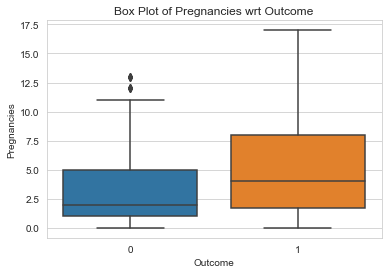

In [10]:
#box plot to visualize the outliers

sns.set_style("whitegrid")
  
sns.boxplot(y = 'Pregnancies', x = 'Outcome', data = df).set(title="Box Plot of Pregnancies wrt Outcome")

[Text(0.5, 1.0, 'Box Plot of Glucose wrt Outcome')]

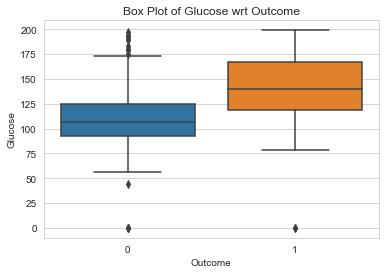

In [11]:
sns.boxplot(y = 'Glucose', x = 'Outcome', data = df).set(title="Box Plot of Glucose wrt Outcome")

[Text(0.5, 1.0, 'Box Plot of BloodPressure wrt Outcome')]

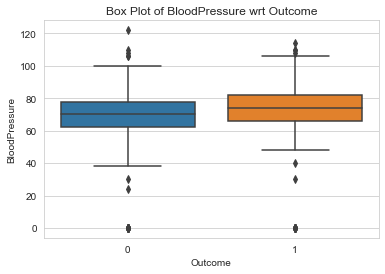

In [12]:
sns.boxplot(y = 'BloodPressure', x = 'Outcome', data = df).set(title="Box Plot of BloodPressure wrt Outcome")

[Text(0.5, 1.0, 'Box Plot of SkinThickness wrt Outcome')]

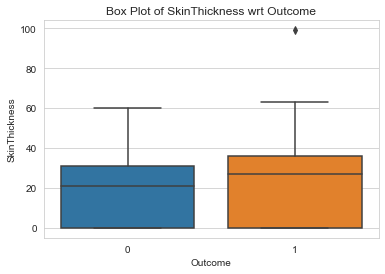

In [13]:
sns.boxplot(y = 'SkinThickness', x = 'Outcome', data = df).set(title="Box Plot of SkinThickness wrt Outcome")

[Text(0.5, 1.0, 'Box Plot of DiabetesPedigreeFunction wrt Outcome')]

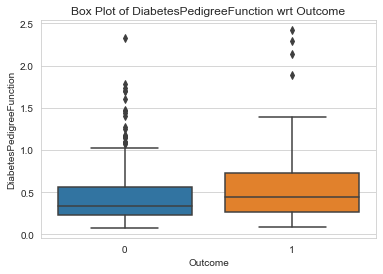

In [15]:
sns.boxplot(y = 'DiabetesPedigreeFunction', x = 'Outcome', data = df).set(title="Box Plot of DiabetesPedigreeFunction wrt Outcome")

[Text(0.5, 1.0, 'Box Plot of Age wrt Outcome')]

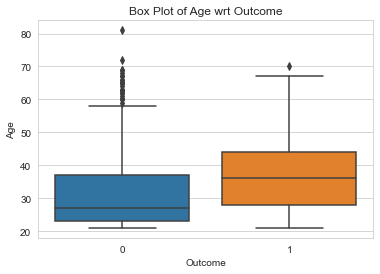

In [16]:
sns.boxplot(y = 'Age', x = 'Outcome', data = df).set(title="Box Plot of Age wrt Outcome")

[Text(0.5, 1.0, 'Box Plot of Age wrt Outcome')]

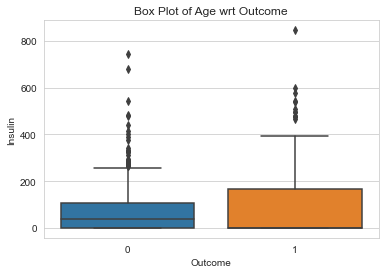

In [17]:
sns.boxplot(y = 'Insulin', x = 'Outcome', data = df).set(title="Box Plot of Age wrt Outcome")

[Text(0.5, 1.0, 'Box Plot of Age wrt Outcome')]

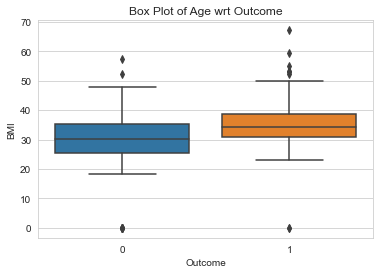

In [18]:
sns.boxplot(y = 'BMI', x = 'Outcome', data = df).set(title="Box Plot of Age wrt Outcome")

In [19]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# KNN Outlier Detection

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

## Outliers for Pregnancies and Glucose 

In [60]:
df1 = df[["Pregnancies", "Glucose"]]

In [61]:
df1

,Pregnancies,Glucose
0,6,148
1,1,85
2,8,183
3,1,89
4,0,137
...,...,...
763,10,101
764,2,122
765,5,121
766,1,126


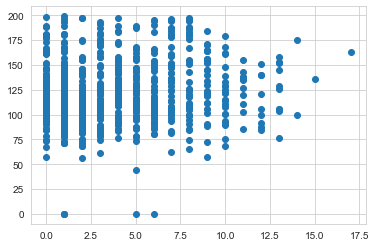

In [62]:
plt.scatter(df1["Pregnancies"], df1["Glucose"])

In [63]:
X = df1.values

In [64]:
X

array([[  6, 148],
       [  1,  85],
       [  8, 183],
       ...,
       [  5, 121],
       [  1, 126],
       [  1,  93]], dtype=int64)

In [65]:
# instantiate model
nbrs = NearestNeighbors(n_neighbors = 3)
# fit model
nbrs.fit(X)

NearestNeighbors(n_neighbors=3)

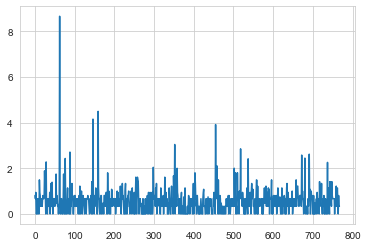

In [66]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(X)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

#### As we see in the figure above, some cutoff possibilities are — 1.6, 1.720, 1.8 (y-axis), each filtering a progressively higher number of outliers.

In [67]:
# visually determine cutoff values > 0.15
outlier_index = np.where(distances.mean(axis = 1) > 1.8)
outlier_index

(array([ 24,  28,  62,  76,  88, 146, 159, 298, 352, 357, 358, 455, 458,
        502, 510, 518, 537, 672, 680, 691, 737], dtype=int64),)

In [68]:
# filter outlier values
outlier_values = df1.iloc[outlier_index]
outlier_values

,Pregnancies,Glucose
24,11,143
28,13,145
62,5,44
76,7,62
88,15,136
146,9,57
159,17,163
298,14,100
352,3,61
357,13,129


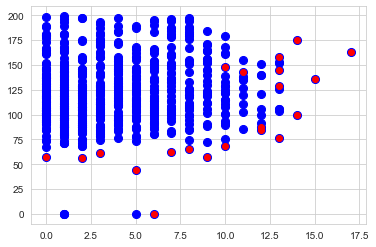

In [69]:
    # plot data
    plt.scatter(df1["Pregnancies"], df1["Glucose"], color = "b", s = 65)
    # plot outlier values
    plt.scatter(outlier_values["Pregnancies"], outlier_values["Glucose"], color = "r")

## Outliers for BloodPressure and SkinThickness 

In [38]:
df2 = df[["BloodPressure", "SkinThickness"]]
df2

,BloodPressure,SkinThickness
0,72,35
1,66,29
2,64,0
3,66,23
4,40,35
...,...,...
763,76,48
764,70,27
765,72,23
766,60,0


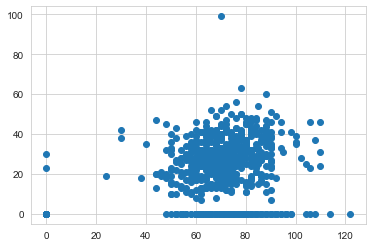

In [39]:
plt.scatter(df2["BloodPressure"], df2["SkinThickness"])

In [41]:
X = df2.values
X

array([[72, 35],
       [66, 29],
       [64,  0],
       ...,
       [72, 23],
       [60,  0],
       [70, 31]], dtype=int64)

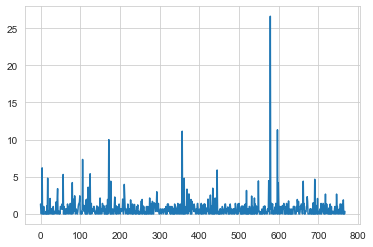

In [42]:
nbrs = NearestNeighbors(n_neighbors = 3)
# fit model
nbrs.fit(X)
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(X)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

In [44]:
# visually determine cutoff values > 0.15
outlier_index = np.where(distances.mean(axis = 1) > 2.5)
outlier_index

(array([  4,  18,  43,  57,  80, 106, 120, 125, 172, 177, 211, 293, 357,
        362, 369, 374, 428, 434, 445, 519, 549, 575, 579, 597, 599, 662,
        691, 718, 746], dtype=int64),)

In [45]:
# filter outlier values
outlier_values = df2.iloc[outlier_index]
outlier_values

,BloodPressure,SkinThickness
4,40,35
18,30,38
43,110,24
57,88,60
80,44,13
106,122,0
120,76,56
125,30,42
172,0,23
177,110,46


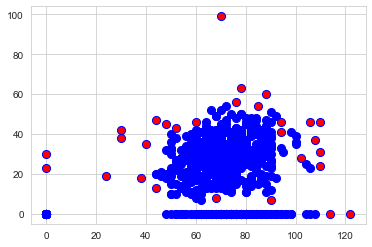

In [47]:
# plot data
plt.scatter(df2["BloodPressure"], df2["SkinThickness"], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["BloodPressure"], outlier_values["SkinThickness"], color = "r")

# Outliers for DiabetesPedigreeFunction and Age 

In [48]:
df3 = df[["DiabetesPedigreeFunction", "Age"]]
df3

,DiabetesPedigreeFunction,Age
0,0.627,50
1,0.351,31
2,0.672,32
3,0.167,21
4,2.288,33
...,...,...
763,0.171,63
764,0.340,27
765,0.245,30
766,0.349,47


array([[ 0.627, 50.   ],
       [ 0.351, 31.   ],
       [ 0.672, 32.   ],
       ...,
       [ 0.245, 30.   ],
       [ 0.349, 47.   ],
       [ 0.315, 23.   ]])

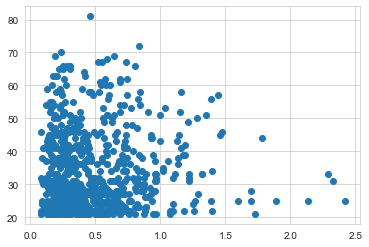

In [49]:
plt.scatter(df3["DiabetesPedigreeFunction"], df3["Age"])

X = df3.values
X


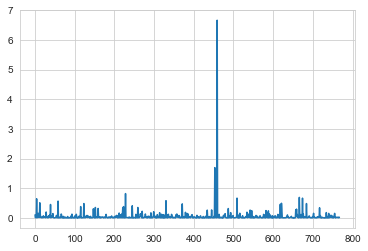

In [50]:
nbrs = NearestNeighbors(n_neighbors = 3)
# fit model
nbrs.fit(X)
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(X)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

In [54]:
# visually determine cutoff values > 0.15
outlier_index = np.where(distances.mean(axis = 1) > 0.3)
outlier_index

(array([  4,  12,  39,  58, 115, 123, 147, 152, 159, 221, 223, 228, 245,
        259, 330, 371, 453, 459, 487, 509, 618, 621, 666, 674, 684, 717],
       dtype=int64),)

In [55]:
# filter outlier values
outlier_values = df3.iloc[outlier_index]
outlier_values

,DiabetesPedigreeFunction,Age
4,2.288,33
12,1.441,57
39,1.390,56
58,1.781,44
115,0.539,61
123,0.186,69
147,1.400,34
152,1.189,42
159,0.817,47
221,0.805,66


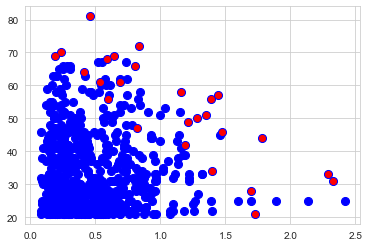

In [56]:
# plot data
plt.scatter(df3["DiabetesPedigreeFunction"], df3["Age"], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["DiabetesPedigreeFunction"], outlier_values["Age"], color = "r")

## Outliers for Insulin and BMI 

In [70]:
df4 = df[["Insulin", "BMI"]]
df4

,Insulin,BMI
0,0,33.6
1,0,26.6
2,0,23.3
3,94,28.1
4,168,43.1
...,...,...
763,180,32.9
764,0,36.8
765,112,26.2
766,0,30.1


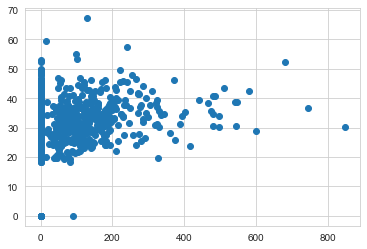

In [71]:
plt.scatter(df4["Insulin"], df4["BMI"])

In [72]:
X = df4.values
df4

,Insulin,BMI
0,0,33.6
1,0,26.6
2,0,23.3
3,94,28.1
4,168,43.1
...,...,...
763,180,32.9
764,0,36.8
765,112,26.2
766,0,30.1


In [73]:
# instantiate model
nbrs = NearestNeighbors(n_neighbors = 3)
# fit model
nbrs.fit(X)

NearestNeighbors(n_neighbors=3)

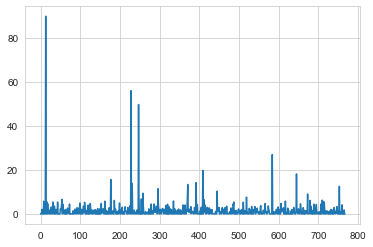

In [74]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(X)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

In [78]:
# visually determine cutoff values > 0.15
outlier_index = np.where(distances.mean(axis = 1) >5)
outlier_index

(array([  8,  13,  16,  31,  43,  54, 111, 162, 177, 186, 228, 231, 247,
        248, 254, 258, 296, 335, 370, 371, 392, 409, 412, 445, 487, 511,
        519, 584, 617, 645, 673, 679, 710, 713, 715, 753], dtype=int64),)

In [79]:
# filter outlier values
outlier_values = df4.iloc[outlier_index]
outlier_values

,Insulin,BMI
8,543,30.5
13,846,30.1
16,230,45.8
31,245,31.6
43,240,45.4
54,342,34.7
111,495,34.0
162,285,44.2
177,130,67.1
186,495,30.1


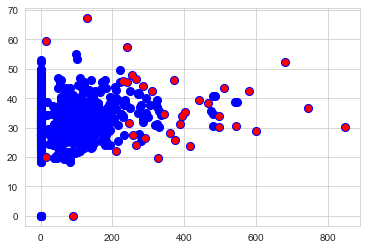

In [80]:
# plot data
plt.scatter(df4["Insulin"], df4["BMI"], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["Insulin"], outlier_values["BMI"], color = "r")